## Detrended and lagged cross correlations

All possible features:

Let $k$ be the number of nearest neighbors , $N$ be the set of detrending orders, $L$ be the set of lags, and $D$ be the set of pooling depths.

We have $n + 1$ detrended movies, so there are $(k + 1) \, |L| \, |N| \, |D| \, $ NN x-correlations per pixel. Reasonable values are $N=\{0, 1, 2\}$, $L=\{0, 1, 2\}$, and $D=\{0, 1, 2\}$. Also, $k=8$. Therefore, there are $9 \times 3 \times 3 \times 3 = 243$ features. More conservatively, we could have $9 \times 2 \times 2 \times 2 = 72$ features.

In [1]:
%matplotlib inline

import os
import sys
notebook_path = os.path.abspath('.')
sources_path = os.path.abspath(os.path.join(notebook_path, '..'))
sys.path.insert(0, sources_path)
import yaml

import matplotlib.pylab as plt
import numpy as np
import torch
import logging

from cellmincer.opto_ws import OptopatchBaseWorkspace
from cellmincer.opto_features import OptopatchGlobalFeatureExtractor

device = torch.device("cpu")
dtype = torch.float32

def new_fig(figsize=(15, 5)):
    fig = plt.figure(figsize=figsize)
    ax = plt.gca()
    return fig, ax

logger = logging.getLogger()
log_info = logger.warning

torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = True

In [2]:
data_source = 'optosynth'


if data_source == 'optosynth':
    
    data_dir = '/home/jupyter/bw-data/Optosynth'
#     optosynth_runs = [(1, 5, 50), (2, 5, 50), (3, 5, 50), (4, 5, 50), (5, 5, 50)]
#     optosynth_runs = [(1, 10, 200), (2, 10, 200), (3, 10, 200), (4, 10, 200), (5, 10, 200)]
    optosynth_runs = [(1, 20, 50), (2, 20, 50), (3, 20, 50), (4, 20, 50), (5, 20, 50)]
    opto_mov_prefixes = [f'optosynth_first_wave__{trial}__{neurons}__{noise}'
        for trial, neurons, noise in optosynth_runs
    ]

elif data_source == 'sami':
    
    data_dir = '/home/jupyter/bw-data/Optopatch'
    # names
    opto_mov_prefixes = [
        'D1_FOV3_W2_at135105',
        'D4_FOV2_W2_at171603',
        'D4_FOV3_W2_at172029',
        'E3_FOV1_W2_at155440',
        'F1_FOV2_W1_at143005'
    ]

else:
    logger.warning('Unrecognized data source; please specify')

# list of Optopatch movies
opto_mov_path_list = [
    os.path.join(data_dir, f'preproc-data/{prefix}_trend_subtracted.npy')
    for prefix in opto_mov_prefixes]

# output
feature_path = os.path.join(data_dir, 'preproc-feature-data')

if not os.path.exists(feature_path):
    os.mkdir(feature_path)

In [19]:
i_dataset = 4

if data_source == 'optosynth':
    yaml_path = os.path.join(os.path.join(data_dir, 'data', opto_mov_prefixes[i_dataset], 'metadata/optosynth_params.yaml'))

    with open(yaml_path, 'r') as stream:
        try:
            config = yaml.safe_load(stream)
        except yaml.YAMLError as exc:
            print(exc)
    
    n_segments = config['n_segments']
    n_frames_per_segment = config['n_frames_per_segment']

elif data_source == 'sami':
    n_segments = 10

ws_base = OptopatchBaseWorkspace.from_npy(opto_mov_path_list[i_dataset])

Loading movie from /home/jupyter/bw-data/Optosynth/preproc-data/optosynth_first_wave__5__20__50_trend_subtracted.npy ...


In [20]:
feature_extractor = OptopatchGlobalFeatureExtractor(
    ws_base=ws_base,
    logger=logger,
    max_depth=1,
    device=torch.device("cpu"))

threshold: 0.337201987712511
Calculating x-corr (0, -1, -1) at depth 0 for detrended movie...
Calculating x-corr (0, -1, -1) at depth 0 for the trend...
Calculating x-corr (0, -1, 0) at depth 0 for detrended movie...
Calculating x-corr (0, -1, 0) at depth 0 for the trend...
Calculating x-corr (0, -1, 1) at depth 0 for detrended movie...
Calculating x-corr (0, -1, 1) at depth 0 for the trend...
Calculating x-corr (0, 0, -1) at depth 0 for detrended movie...
Calculating x-corr (0, 0, -1) at depth 0 for the trend...
Calculating x-corr (0, 0, 1) at depth 0 for detrended movie...
Calculating x-corr (0, 0, 1) at depth 0 for the trend...
Calculating x-corr (0, 1, -1) at depth 0 for detrended movie...
Calculating x-corr (0, 1, -1) at depth 0 for the trend...
Calculating x-corr (0, 1, 0) at depth 0 for detrended movie...
Calculating x-corr (0, 1, 0) at depth 0 for the trend...
Calculating x-corr (0, 1, 1) at depth 0 for detrended movie...
Calculating x-corr (0, 1, 1) at depth 0 for the trend...

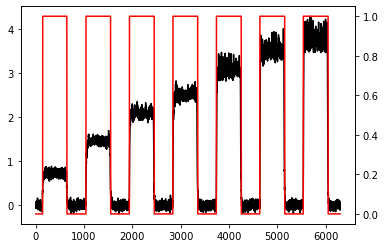

In [21]:
fig = plt.figure()
ax = plt.gca()
ax2 = ax.twinx()
ax.plot(np.mean(ws_base.movie_txy, axis=(-1, -2)), color='black')
ax2.plot(feature_extractor.active_mask_t, color='red')

## Save features

In [22]:
import pickle
with open(os.path.join(feature_path, opto_mov_prefixes[i_dataset] + "__features.pkl"), 'wb') as f:
    pickle.dump(feature_extractor.features, f)

## Exploration

In [ ]:
fig = plt.figure(figsize=(20, 6))

features = feature_extractor.features

idx = 1
print(features.feature_name_list[idx])
print(features.feature_depth_list[idx])
im = plt.imshow(features.feature_array_list[idx].T)
plt.colorbar(im)

trend_std_0
0
